In [15]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
pd.plotting.register_matplotlib_converters()
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import umap

In [16]:
data = pd.read_csv("GSE20680.csv")
data.head()

,sample_id,cad_status,g1,g2,g3,g4,g5,g6,g7,g8,...,g45006,g45007,g45008,g45009,g45010,g45011,g45012,g45013,g45014,g45015
0,GSM518638,Control (0),14.411865,4.382594,4.383032,4.383413,4.383747,4.384047,4.384308,4.384539,...,4.375744,4.375470,4.375175,4.374851,4.374460,4.374081,4.373631,4.373159,14.601661,14.611620
1,GSM518639,Control (0),14.716279,4.364848,4.365359,4.365832,4.366276,4.366695,4.367058,4.367406,...,4.369999,4.369760,4.369473,4.369171,4.368822,4.368453,4.368054,4.367606,14.644090,14.645912
2,GSM518640,Control (0),14.774350,4.411638,4.412673,4.413624,4.414528,4.415355,4.416127,4.416819,...,4.414065,4.413724,4.413332,4.412898,4.412431,4.411905,4.490200,4.410683,14.762733,14.760449
3,GSM518641,Control (0),13.386424,4.378086,4.378739,4.379347,4.379895,4.380422,4.380914,4.381344,...,4.381866,4.381684,4.381487,4.381260,4.381008,4.402942,4.380408,4.380068,12.963127,12.872982
4,GSM518642,Control (0),13.486229,4.364260,4.364589,4.364898,4.365172,4.365435,4.365664,4.365880,...,4.359774,4.359587,4.359380,4.359152,4.358910,4.358640,4.358351,4.358035,13.632483,13.543409


In [17]:
data_matrix = data.iloc[0:196,2:45017]
data_matrix.iloc[0:10, 0:10]
gene_variability = data_matrix.var(axis=0)  # Or you can use np.std(data, axis=1) for standard deviation
sorted_genes = gene_variability.sort_values(ascending=False)

In [29]:
SS = MinMaxScaler()

# Apply scaling
data_scaled = pd.DataFrame(SS.fit_transform(data_matrix), columns=data_matrix.columns)

# PCA
pca = PCA(n_components=2)
data_scaled_pca = pca.fit_transform(data_scaled)

# Convert to data frame
principal_df = pd.DataFrame(data = data_scaled_pca, columns = ['PC1', 'PC2'])
principal_df = principal_df.join(gse_20680['cad_status'])

# Shape and preview
print(principal_df.shape)
print(pca.explained_variance_ratio_)

(195, 3)
[0.1889748 0.10428  ]


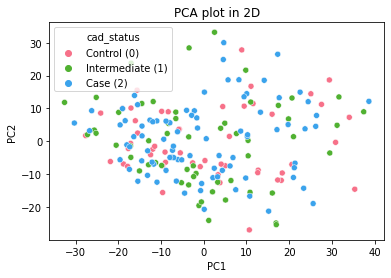

In [30]:
plt.figure()

# Scatterplot
sns.scatterplot(x=principal_df.iloc[:,0], y=principal_df.iloc[:,1], hue=principal_df.iloc[:,2], palette='husl')

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()

In [20]:
# t-SNE
tsne = TSNE(n_components=2)
data_scaled_tsne = tsne.fit_transform(data_scaled)

# Convert to data frame
tsne_df = pd.DataFrame(data = data_scaled_tsne, columns = ['tsne comp. 1', 'tsne comp. 2'])
tsne_df = tsne_df.join(gse_20680['cad_status'])

# Shape and preview
print(tsne_df.shape)
tsne_df.head()

(195, 3)


,tsne comp. 1,tsne comp. 2,cad_status
0,5.992016,-6.989237,Control (0)
1,-0.017584,-2.492585,Control (0)
2,-0.270244,5.106811,Control (0)
3,7.647874,-9.723034,Control (0)
4,4.928022,-6.776754,Control (0)


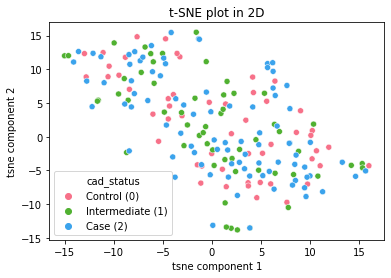

In [21]:
plt.figure()

# Scatterplot
sns.scatterplot(x=tsne_df.iloc[:,0], y=tsne_df.iloc[:,1], hue=tsne_df.iloc[:,2], palette='husl')

# Aesthetics
plt.title('t-SNE plot in 2D')
plt.xlabel('tsne component 1')
plt.ylabel('tsne component 2')

plt.show()

In [31]:
# UMAP
um = umap.UMAP()
data_scaled_fit = um.fit(data_scaled)           # we'll use X_fit later
data_scaled_umap = um.transform(data_scaled)

# Convert to data frame
umap_df = pd.DataFrame(data = data_scaled_umap, columns = ['umap comp. 1', 'umap comp. 2'])
umap_df = umap_df.join(gse_20680['cad_status'])

# Shape and preview
print(umap_df.shape)
umap_df.head()

(195, 3)


,umap comp. 1,umap comp. 2,cad_status
0,9.529558,-0.448035,Control (0)
1,7.546840,0.096768,Control (0)
2,7.846798,1.628054,Control (0)
3,8.653217,1.107342,Control (0)
4,9.251546,-0.734289,Control (0)


/Users/theresachristiansen/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


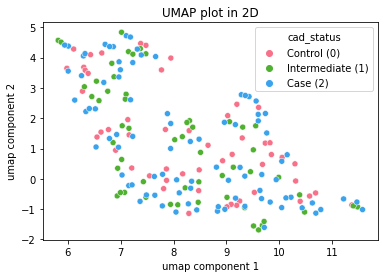

In [32]:
plt.figure()

# Scatterplot
sns.scatterplot(umap_df.iloc[:,0], umap_df.iloc[:,1], hue=umap_df.iloc[:,2], palette='husl')

# Aesthetics
plt.title('UMAP plot in 2D')
plt.xlabel('umap component 1')
plt.ylabel('umap component 2')

plt.show()

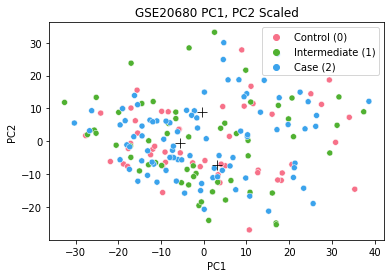

Jaccard Score: 0.18988214752014496


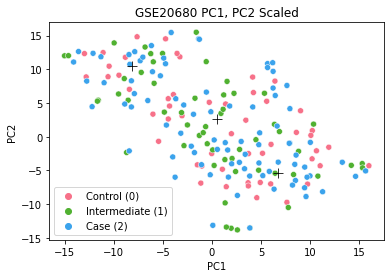

Jaccard Score: 0.19571735089461925


In [25]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import stats
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,pairwise_distances_argmin, pairwise_distances, jaccard_score
import seaborn as sns

#Cluster PCA
PCA_kmeans = KMeans(n_clusters=3, random_state=0).fit(principal_df.iloc[:,[0,1]])
PCA_clusters = principal_df.join(pd.DataFrame(PCA_kmeans.labels_, columns=['predicted_label']))
sns.scatterplot(x = PCA_clusters['PC1'],
                y = PCA_clusters['PC2'],
                hue=gse_20680['cad_status'],
                palette='husl')
sns.scatterplot(x=tSNE_kmeans.cluster_centers_[:, 0],
                y=tSNE_kmeans.cluster_centers_[:, 1],
                s=100,
                marker = "+",
                color = "black")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("GSE20680 PC1, PC2 Scaled")
plt.show()

PCA_clusters['cad_status'].replace({'Control (0)': 0, 'Intermediate (1)': 1, 'Case (2)':2}, inplace=True)
conf_matrix = confusion_matrix(PCA_clusters['cad_status'], PCA_kmeans.labels_)  
jaccard = jaccard_score(PCA_clusters['cad_status'], PCA_kmeans.labels_, average='macro')   
print("Jaccard Score:", jaccard)
plt.show()

#Cluster tSNE
tSNE_kmeans = KMeans(n_clusters=3, random_state=0).fit(tsne_df.iloc[:,[0,1]])
tSNE_pca_clusters = tsne_df.join(pd.DataFrame(tSNE_kmeans.labels_, columns=['predicted_label']))
sns.scatterplot(x = tSNE_pca_clusters['tsne comp. 1'],
                y = tSNE_pca_clusters['tsne comp. 2'],
                hue=gse_20680['cad_status'],
                palette='husl')
sns.scatterplot(x=tSNE_kmeans.cluster_centers_[:, 0],
                y=tSNE_kmeans.cluster_centers_[:, 1],
                s=100,
                marker = "+",
                color = "black")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("GSE20680 PC1, PC2 Scaled")
plt.show()

tSNE_pca_clusters['cad_status'].replace({'Control (0)': 0, 'Intermediate (1)': 1, 'Case (2)':2}, inplace=True)
conf_matrix = confusion_matrix(tSNE_pca_clusters['cad_status'],tSNE_kmeans.labels_)  
jaccard = jaccard_score(tSNE_pca_clusters['cad_status'], tSNE_kmeans.labels_, average='macro')   
print("Jaccard Score:", jaccard)
plt.show()

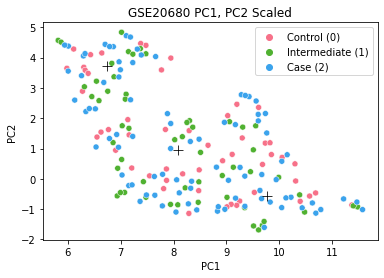

Jaccard Score: 0.20819721309259695


In [33]:
#Cluster UMAP
umap_kmeans = KMeans(n_clusters=3, random_state=0).fit(umap_df.iloc[:,[0,1]])
umap_pca_clusters = umap_df.join(pd.DataFrame(umap_kmeans.labels_, columns=['predicted_label']))
sns.scatterplot(x = umap_pca_clusters['umap comp. 1'],
                y = umap_pca_clusters['umap comp. 2'],
                hue=gse_20680['cad_status'],
                palette='husl')
sns.scatterplot(x=umap_kmeans.cluster_centers_[:, 0],
                y=umap_kmeans.cluster_centers_[:, 1],
                s=100,
                marker = "+",
                color = "black")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("GSE20680 PC1, PC2 Scaled")
plt.show()

umap_pca_clusters['cad_status'].replace({'Control (0)': 0, 'Intermediate (1)': 1, 'Case (2)':2}, inplace=True)
conf_matrix = confusion_matrix(umap_pca_clusters['cad_status'],umap_kmeans.labels_)  
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=range(len(conf_matrix)))
jaccard = jaccard_score(umap_pca_clusters['cad_status'], umap_kmeans.labels_, average='macro')   
print("Jaccard Score:", jaccard)
plt.show()
